# Text Mining Project MLDS - Subject 3

---
<b>Authors :</b> 
<li>FHIYIL SOUFIANE</li>
<li>MOUHDA MOHAMMED REDA</li>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
import random

%matplotlib inline

## Create our dataset (Jeux de données)

---
#### read the data "NG5"

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = [ 'rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'sci.space', 'talk.politics.mideast' ] 
ng5 = fetch_20newsgroups(categories=categories) 
documents = ng5.data

In [3]:
len(documents)

2936

In [4]:
documents_df = pd.DataFrame(np.c_[documents], columns=['document'])

In [5]:
documents_df.head()

,document
0,From: tedward@cs.cornell.edu (Edward [Ted] Fis...
1,From: eshneken@ux4.cso.uiuc.edu (Edward A Shne...
2,From: u7711501@bicmos.ee.nctu.edu.tw (jih-shin...
3,From: jerry@sheldev.shel.isc-br.com (Gerald La...
4,From: arens@ISI.EDU (Yigal Arens)\nSubject: Mo...


#### Visualize lenght of documents

In [6]:
lenghts = []
for d in documents:
    lenghts.append(len(d))

In [7]:
T = range(0, len(documents))

In [8]:
lenghts_data = pd.DataFrame(np.c_[T,lenghts],columns=['document','lenght'])

In [9]:
len(T),len(lenghts)

(2936, 2936)

In [10]:
lenghts_data.head()

,document,lenght
0,0,946
1,1,685
2,2,10216
3,3,1102
4,4,10644


[Text(0,0.5,'Lenght'),
 Text(0.5,0,'Document'),
 Text(0.5,1,'Lenght of documents')]

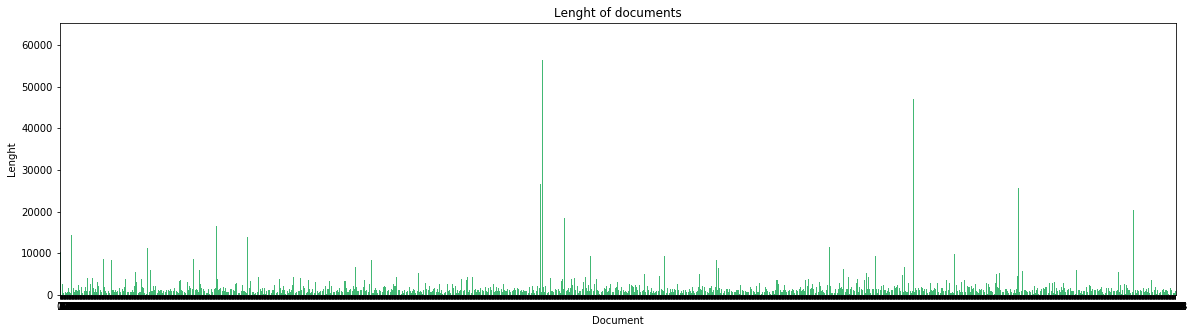

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=lenghts_data, x="document",y="lenght", ax=ax, color="#2ECC71")
ax.set(xlabel='Document', ylabel='Lenght', title="Lenght of documents")

---
### Preprocessing & Tokenization

Before we can create lot of corpus from the original dataset, we should first preprocess the data and clean it, and then tokenize the documents in order to apply different approches for the creation of different corpus

##### Remove Abbreviations

In [12]:
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "i'd":"i would",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    
    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    '\s+':' ' # replace multi space with one single space
}

In [13]:
documents_df.replace(abbr_dict, regex=True, inplace=True)

In [14]:
stop = set(stopwords.words('english')) 
print(stop)

{'do', 'this', 'on', 'whom', 'our', 'then', 'should', 'be', 'am', 'ain', 'you', 'from', 'his', 't', 'him', 'having', 'here', 'to', 'up', 'than', 'm', 'itself', 'they', 'there', 'o', 'such', 'very', 'don', 'that', 'each', 'being', 's', 'because', 'y', 'after', 'below', 'll', 'before', 'or', 'mightn', 'it', 'while', 'ma', 'off', 'she', 'when', 'her', 'hers', 'under', 'how', 'where', 'hasn', 'yourselves', 'further', 'nor', 'no', 'can', 'are', 'most', 'themselves', 'yours', 'wasn', 'wouldn', 'hadn', 'until', 'once', 'we', 'their', 'doing', 'didn', 'had', 'own', 'does', 'more', 'has', 'a', 'who', 'shan', 'ours', 'at', 'these', 'aren', 'needn', 'by', 'again', 'is', 'so', 'between', 'himself', 'during', 'down', 'and', 'been', 'but', 'doesn', 'above', 'theirs', 'me', 'into', 'have', 'myself', 'why', 'couldn', 'through', 'd', 'shouldn', 'my', 'other', 'which', 'if', 'in', 'some', 'weren', 'will', 'won', 'yourself', 've', 'he', 'those', 'an', 'all', 'about', 'with', 'same', 'now', 'were', 'for',

In [19]:
import re

temp =[]
snow = nltk.stem.SnowballStemmer('english')

for sentence in documents_df.document.values:
    sentence = sentence.lower()                                # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)                   # Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)          # Removing Punctuations
    sentence = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", sentence)  # Remove only integers
    sentence = re.sub('\W+',' ', sentence)                     # Remove special characters
    sentence = re.sub(r'\w*\d\w*', '', sentence).strip()       # Remove words containing both integer and string
    
    # Stemming && removing word less than 2 chars && removing stopwords
    words = [snow.stem(word) for word in sentence.split() if len(word) > 2 if word not in stopwords.words('english')]   
    
    temp.append(words)

In [20]:
clean_documents_df = pd.DataFrame(np.c_[temp],columns=['document'])

In [21]:
clean_documents_df.head()

,document
0,"[tedward, cornel, edu, edward, ted, fischer, s..."
1,"[eshneken, cso, uiuc, edu, edward, shnekendorf..."
2,"[bicmo, nctu, edu, jih, shin, subject, organ, ..."
3,"[jerri, sheldev, shel, isc, com, gerald, lanza..."
4,"[aren, isi, edu, yigal, aren, subject, adl, sp..."


In [36]:
original_corpus = []
for document in clean_documents_df.document.values:
    original_corpus.append(' '.join(document))

In [22]:
del temp

---
### Apply different approaches to create many corpuses

#### Take words randomly from each document by a percentage %

In [38]:
def create_corpus(corpus, percentage):
    temp = []
    for document in corpus:
        lenght = len(document)
        num_to_select = int(lenght * (percentage/100))
        temp.append(random.sample(document, num_to_select))
    return temp

In [39]:
new_corpus = create_corpus(clean_documents_df.document.values, percentage=30)

In [40]:
len(new_corpus)

2936

## Vectorization of documents

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD


#set vectorizer
vectorizer = CountVectorizer()

#set tf-idf
tfidf = TfidfTransformer()


#set dimensionality reduction SVD
svd_model = TruncatedSVD(n_components=300, 
                         algorithm='randomized',
                         n_iter=10, random_state=0)

#init Pipeline
pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('tfidf', tfidf),
            ('svd', svd_model)
        ])

#fit the pipeline
svd_matrix = pipeline.fit_transform(original_corpus)

In [45]:
svd_matrix.shape

(2936, 300)